
# <center>Проведение исследования по выявлению закономерностей, определяющих успешность игры<center>
Анализируем исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанрах и платформах.

Перед нами данные до 2016 года. Данные за 2016 год не полные.

**Цель исследования:** *Выявить определяющие успешность игры закономерности для определения потенциально популярных продуктов и планирования рекламной кампании.*

**Ход исследования:**
- Обзор данных
- Предобработка данных
- Исследовательский анализ данных
- Составляем портрет пользователя каждого региона
- Проверяем гипотезы
- Общий вывод

**Проверяемые гипотезы:**
- *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;*
- *Средние пользовательские рейтинги жанров Action и Sports разные.*

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/Users/macbook/Desktop/data/games.csv')

In [3]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12403,Meitantei Conan: Aoki Houseki no Rinbukyoku,DS,2011.0,Adventure,0.00,0.00,0.06,0.00,NaN,NaN,NaN
10141,Call of Juarez: The Cartel,PC,2011.0,Shooter,0.05,0.05,0.00,0.01,51.0,3.3,M
16341,Builder's Block,PS,1999.0,Strategy,0.01,0.00,0.00,0.00,NaN,NaN,NaN
11183,Ys I & II Chronicles,PSP,2009.0,Role-Playing,0.05,0.00,0.03,0.01,NaN,NaN,NaN
4850,Call of Duty: Finest Hour,GC,2004.0,Shooter,0.31,0.08,0.00,0.01,74.0,8.9,T


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


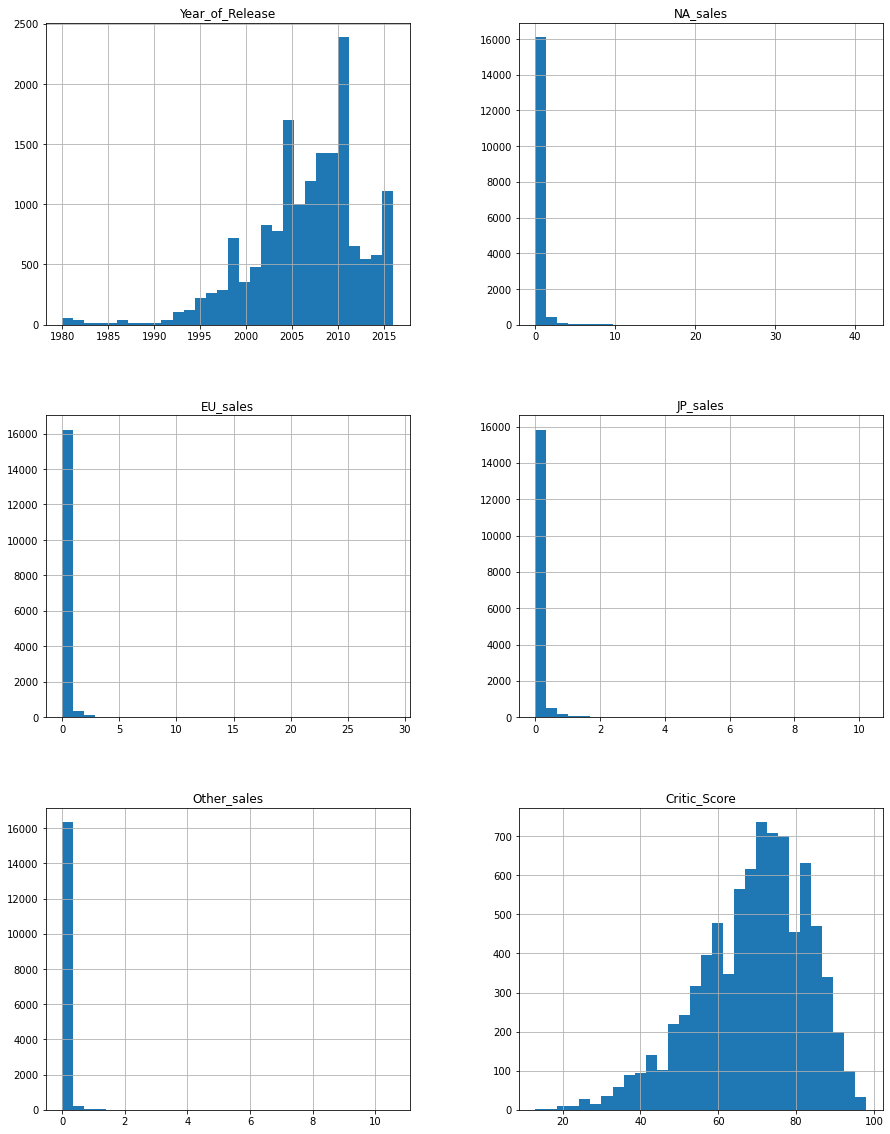

In [5]:
df.hist(figsize=(15,20), bins=30);

### ВЫВОД

<div style="border:solid green 3px; padding: 30px">

В таблице 11 столбцов, 16715 строк. Тип данных object и float64.

В соответствии с документацией к данным: 
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB

Количество значений в столбцах разное, соответственно в данных присутствуют пропуски.

Количество продаж по регионам тяготеет к 0. Это может говорить о том, что огромное количество игры покупает очень маленькая аудитория
    
</div>

## Предобработка данных

Для предобратоки данных выделяем слудющие задачи:
- [x] Приведение в соответствие название колонок
- [x] Работа с пропусками
- [x] Проверка столбцов на наличие неявных дубликатов 
- [x] Изменение типов данных 
- [x] Проверка на наличие полных дубликатов

### Переименование колонок

In [6]:
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Первичная оценка пропусков

In [8]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### ВЫВОД

В столбцах `name`, `year_of_release`, `genre` не заполненны менее 2% ячеек. Решение по ним примем после того, как взглянем на эти ячейки. Вреятнее всего эти строки просто удалим.

Больше всего данных не хватает в стобцах `critic_score`, `user_score` и `rating`. В них не хватает от 40 до 51% процента. 

### Предобработка столбца `name`

Проведем проверку на ниличие явных дубликатов. Проведем работу с пропусками

In [10]:
df['name'].value_counts().reset_index()

,index,name
0,Need for Speed: Most Wanted,12
1,Madden NFL 07,9
2,LEGO Marvel Super Heroes,9
3,Ratatouille,9
4,FIFA 14,9
...,...,...
11554,Too Human,1
11555,Final Approach 2: 1st Priority,1
11556,DJ Star,1
11557,Kung-Fu: High Impact,1


In [11]:
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


На основании представленных выше таблиц, видно, что названия игр могут повторяться в связи с выпусками на разных платформах и перевыпусках игр в другие года.

In [12]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В строках где отсутствует наименование, так же отсутствуют значения в столбцах с оценкой критиков и пользователей, а также рейтинга.

In [13]:
df = df.dropna(subset=['name'])

In [14]:
df['name'].isna().sum()

0

### Предобработка столбца `year_of_release`

In [15]:
df['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

<AxesSubplot:ylabel='Frequency'>

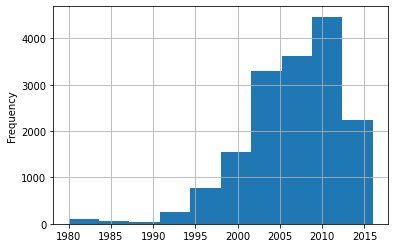

In [16]:
df['year_of_release'].plot(kind='hist', grid=True)

В данном столбце представлена информация по году выпуска игры на различных платформах, с 1980 по 2016г. Для предобработки необходимо решить следующие проблемы:
- Пропуски
- Формат данных
- Дубликаты

#### Обработка пропусков

In [17]:
df['year_of_release'].isna().sum()

269

In [18]:
df['year_of_release'].isna().mean()

0.016095255190570215

В данном столбце присутствует 269 пропусков, что составляет 1,6% от общего количества строк. 

Возможные правила заполнения пропусков:

- Если у игры есть не менее двух заполненных строк и год выпуска в этих строках один и тот же, то в пропущенных местах укажем такой же год.
- Если в название игры присутствует год, можно попробовать заполнить пропуски на основании этой информации.

Так как, дальше в исследование будем анализировать этот столбец, то лучше  **удалим не заполенные строки.**



In [19]:
df = df.dropna(subset=['year_of_release'])

In [20]:
df['year_of_release'].isna().sum()

0

#### Формат данных

Приводим данные к формату `int`. Приводить данные к формату `datetime` смысла нету, так как в столбце указан только год

In [21]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


### Предобработка столбца `genre`

In [23]:
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Аномальных значений нет

### Предобработка столбца `na_sales`

In [24]:
df['na_sales'].describe()

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Аномальных значений нет

### Предобработка столбца `eu_sales`

In [25]:
df['eu_sales'].describe()

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

Аномальных значений нет

### Предобработка столбца `jp_sales`

In [26]:
df['jp_sales'].describe()

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

Аномальных значений нет

### Предобработка столбца `other_sales`

In [27]:
df['other_sales'].describe()

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Аномальных значений нет

### Предобработка столбца `critic_score`

In [28]:
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [29]:
df['critic_score'].isna().sum()

8461

Аномальных значений нет. Проанализируем пропуски и изменим формат данных

#### Пропуски

In [30]:
df['critic_score'].isna().sum()

8461

In [31]:
df['critic_score'].isna().mean()

0.5145341765993675

In [32]:
df[df['critic_score'].isna()].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5514,Sakura Wars 3: Paris wa Moeteiru ka,DC,2001,Adventure,0.00,0.00,0.33,0.00,NaN,NaN,NaN
13655,The Monkey King: The Legend Begins,Wii,2007,Shooter,0.04,0.00,0.00,0.00,NaN,tbd,E
10375,Kamen Rider: Climax Heroes,PS2,2009,Fighting,0.00,0.00,0.11,0.00,NaN,NaN,NaN
3018,The Fairly Odd Parents: Breakin Da Rules,PS2,2003,Platform,0.33,0.25,0.00,0.09,NaN,NaN,NaN
14824,Eureka Seven AO: Jungfrau no Hanabanatachi,PS3,2012,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данном столбце отсутствует информация по 7946 строкам, что составляет 51,4% от общего количества. Заполним пустые значения заглушкой, равной -1.

Причина такого количества пропусков скорее всего кроется в технической проблеме, так как данные брались из открытых источников.

In [33]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [34]:
df['critic_score'].isna().sum()

0

#### Формат данных

In [35]:
((df['critic_score'] % 1) > 0).sum()

0

Все оценки критиков являются целыми значениями. Переведем в формат `int`

In [36]:
df['critic_score'] = df['critic_score'].astype('int')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


### Предобработка столбца `user_score`

In [38]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [39]:
df['user_score'].isna().sum()

6605

In [40]:
df['user_score'].isna().mean()

0.4016662612503041

В данном столбце представлена информация об оценке пользователей по играм на различных платформах. Минимальная оценка 0, максимальная 9,7. Для предобработки необходимо решить следующие проблемы:

- Значение "tbd"
- Пропуски

#### Значение `tbd`

tbd = To Be Determined. Что значит, будет определенно. Часто эту аббревиатуру указывают, когда оценок мало, для того, чтобы указать усредненный вариант.

Рейнтинг пользователей может принимать значение от 0 до 10, с одной цифрой после запятой. Из-за аббревиатуры столбец имеет тип object, что может привезти к ошибкам и проблемам с вычеслениями. Для иссключения таких ситуаций заменим аббревиатуру tbd на заглушку -1 и поменяем тип столбца на float.

In [41]:
df['user_score'] = df['user_score'].replace('tbd', -1)

In [42]:
df['user_score'] = pd.to_numeric(df['user_score'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [44]:
df['user_score'].describe()

count    9839.000000
mean        5.163919
std         3.715200
min        -1.000000
25%         2.400000
50%         6.900000
75%         8.000000
max         9.700000
Name: user_score, dtype: float64

#### Пропуски

В данном столбце отсутствует информация по 6111 строкам, что составляет 39,6% от общего количества. Как-то реалистично заполнить данные, кроме ручного заполнения из интеренета не возможно. Заменим пустые значения на такую же заглушку.

Причина такого количества пропусков, скорее всего, кроется в технической проблеме, так как данные брались из открытых источников.

In [45]:
df['user_score'] = df['user_score'].fillna(-1)

In [46]:
df['user_score'].describe()

count    16444.000000
mean         2.688081
std          4.170124
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

### Предобработка столбца `rating`

In [47]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [48]:
df['rating'].isna().sum()

6676

In [49]:
df['rating'].isna().mean()

0.40598394551204087

В данном столбце представлена информация о возрастном рейтинге игр на различных платформах. Для предобработки необходимо решить следующие проблемы:

- Кол-во рейтингов
- Пропуски

#### Рейтинги

Удалим рейтинги с единичным количеством игр: EC, K-A, AO, RP. 

In [50]:
del_rating = ['EC', 'K-A', 'AO', 'RP']

for rating in del_rating:
    df = df.drop(df[df['rating'] == rating].index)

In [51]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
Name: rating, dtype: int64

#### Пропуски

In [52]:
df['rating'].isna().sum()

6676

In [53]:
df['rating'].isna().mean()

0.4063051548901467

В данном столбце отсутствует информация по 6182 строкам, что составляет 40,5% от общего количества. Возрастные рейтинги в данном столбце указаны на основании ESRB. Однако они проставляются на игры для Канада и США, если игра выпускалась не для этих регионов, то рейтинга ESRB у нее может и не быть.

Заменим пропущенные значения на заглушку "No rating"

In [54]:
df['rating'] = df['rating'].fillna('No rating')

In [55]:
df['rating'].value_counts()

No rating    6676
E            3921
T            2905
M            1536
E10+         1393
Name: rating, dtype: int64

### Предобработка столбца `platform`

In [56]:
df['platform'].value_counts()

PS2     2126
DS      2119
PS3     1306
Wii     1284
X360    1232
PSP     1193
PS      1189
PC       952
GBA      811
XB       802
GC       541
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

**Неявных дубликатов не видно, аномальных значений не видно**

Удалим очень редкие платформы, по которым выпущенно меньше 100 игр за все время.


In [57]:
del_platform = ['NES','GB', 'DC', 'GEN', 'NG', 'WS', 'SCD',  '3DO', 'TG16', 'GG', 'PCFX']

for platform in del_platform:
    df = df.drop(df[df['platform'] == platform].index)

In [58]:
df['platform'].value_counts()

PS2     2126
DS      2119
PS3     1306
Wii     1284
X360    1232
PSP     1193
PS      1189
PC       952
GBA      811
XB       802
GC       541
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
Name: platform, dtype: int64

### Проверка на явные дубликаты

In [59]:
df.duplicated().sum()

0

In [60]:
df.sample(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9240,Shining Soul,GBA,2002,Role-Playing,0.03,0.01,0.09,0.00,58,8.5,E
336,Spyro: Year of the Dragon,PS,2000,Platform,1.93,1.58,0.00,0.19,91,8.8,E


In [61]:
df[df[['name', 'platform', 'year_of_release']].duplicated()].index

Int64Index([16230], dtype='int64')

In [62]:
df.query('name=="Madden NFL 13" and platform=="PS3" and year_of_release==2012')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


In [63]:
df = df.drop(index=df[df[['name', 'platform', 'year_of_release']].duplicated()].index)

In [64]:
df.query('name=="Madden NFL 13" and platform=="PS3" and year_of_release==2012')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E


**ВЫВОД**

Удалили одно повторение

<div style="border:solid green 3px; padding: 30px">

### ВЫВОД    
    
    В данном блоке были проделанны следюущие действия:
    - Изменение названия колонок
    - Обработка пропусков
    - Изменение формата данных
    - Изменение значений
    - Удаление дубликата
    
    В столбцах `name`, `year_of_release`, `genre` не заполненны менее 2% ячеек. Больше всего данных не хватает в стобцах `critic_score`, `user_score` и `rating`. В них не хватает от 40 до 51% процента. Проблема большого количества пропусков, скорее всего, связана с техническими проблемами, при получении данных из открытых источников 
</div>

## Исследовательский анализ данных

### Количество выпускаемых игр по годам

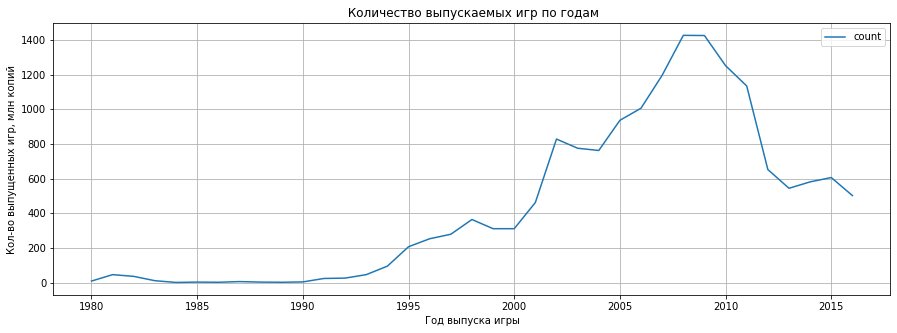

In [65]:
(
    df
    .groupby('year_of_release')['name'].count()
    .reset_index(name='count')
    .plot(
        x='year_of_release', 
        y='count',
        xlabel='Год выпуска игры',
        ylabel='Кол-во выпущенных игр, млн копий',
        figsize=(15, 5),
        grid=True,
        title=' Количество выпускаемых игр по годам'
    )
);

#### ВЫВОД

Начиная с 1989 года, имелась тенденция увеличения количества выпускаемых игр. Пиковым является 2008 год с 1427 выпущенными играми. Начиная с 2009 года начинается спад выпуска игр, который возможно начинает прерываться с 2015 года.

### Изменение продаж в зависимости от платформы

#### Добавим столбец с общим количеством продаж

In [66]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

####  Рейтинг платформ по продажам

In [67]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.32
X360     961.24
PS3      931.33
Wii      890.52
DS       802.13
PS       725.67
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       253.22
XB       249.61
N64      218.01
SNES     200.04
GC       196.62
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
Name: total_sales, dtype: float64

####  6 платформ с самым большим количесвом продаж

In [68]:
platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index

df_platform = (
    df[df['platform'].isin(platforms)]
    .groupby(['platform', 'year_of_release'])['total_sales']
    .sum()
    .reset_index()
)

In [69]:
df_platform.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.32
X360     961.24
PS3      931.33
Wii      890.52
DS       802.13
PS       725.67
Name: total_sales, dtype: float64

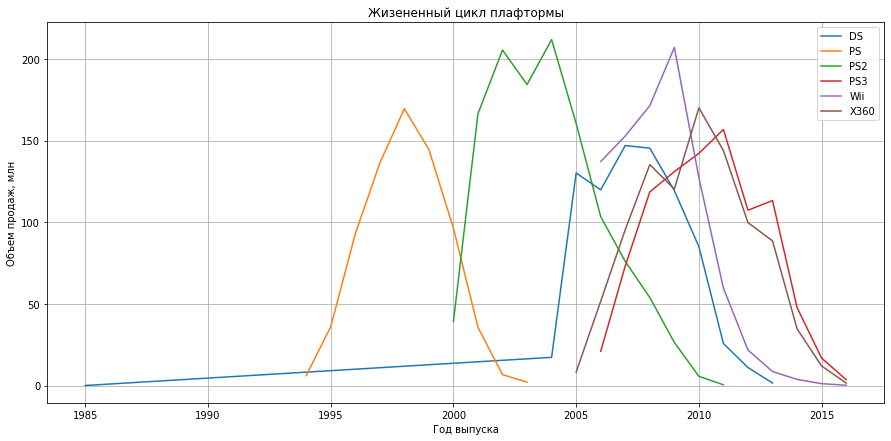

In [70]:
plt.figure(figsize=(15, 7))
for platform, group_data in df_platform.groupby('platform'):
    plt.plot(group_data['year_of_release'], group_data['total_sales'], label=platform)
    plt.title("Жизененный цикл плафтормы")
    plt.xlabel('Год выпуска')
    plt.ylabel('Объем продаж, млн')
    plt.grid(True)
    plt.legend();
plt.show()

#### ВЫВОД

На основании графиков можем предположить, что:
- Жизненный цикл платформы равен от 8 до 11 лет
- Период роста занимает от 3 до 5 лет
- Период спада занимает от 5 до 7 лет

### Определение актуального периода

Актуальный период можем определить на основании того факта, что период роста платформы занимает от 3 до 5 лет.Так как индустрия разработки компьютерных игр динамичная, то возьмем период за 3 года. Так как данные за 2016 год не полные и нет данных за какой период представленна информация за 2016 год, то исключим из анализа 2016 год.

In [71]:
work_df = df.query('year_of_release >= 2013 and year_of_release < 2016')

### Потенциально прибыльные платформы

In [72]:
work_df_platform = work_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

In [73]:
work_df_platform.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     244.89
PS3     177.83
X360    135.28
XOne    133.17
3DS     128.11
WiiU     60.03
PC       34.18
PSV      28.74
Wii      13.48
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

In [74]:
top_platforms = (
    work_df_platform
    .groupby('platform')['total_sales'].sum()
    .sort_values(ascending=False)
    .head(7)
    .index
)

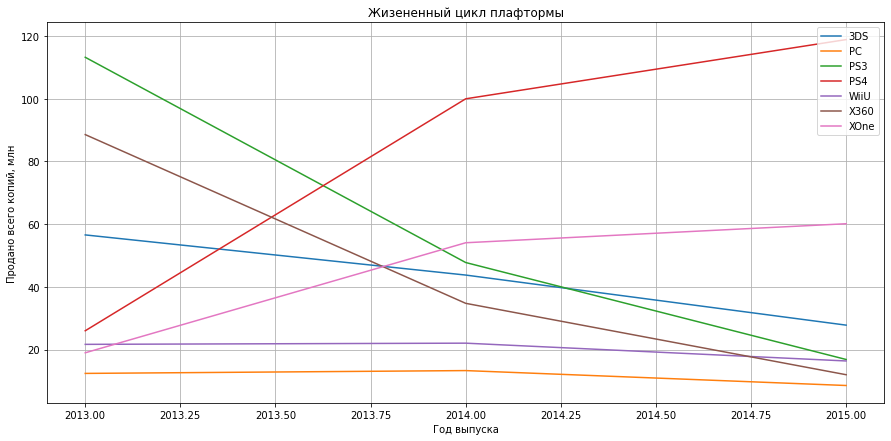

In [75]:
plt.figure(figsize=(15, 7))
for platform, group_data in work_df_platform.query('platform in @top_platforms').groupby('platform'):
    plt.plot(group_data['year_of_release'], group_data['total_sales'], label=platform)
    plt.get_cmap('viridis', 12)
    plt.title("Жизененный цикл плафтормы")                                    
    plt.xlabel('Год выпуска')
    plt.ylabel('Продано всего копий, млн')
    plt.grid(True)
    plt.legend();
plt.show()

#### ВЫВОД

Проанализировав семь платформ лидирующих по объемам продаж, можем сделать следующие выводы:
- **XOne и PS4** являются растущими и потенциально прибыльными платформами для выпуска игр. 
- Остальные платформы подходят к своему закату

### Глобальные продажи игр в разбивке по платформам

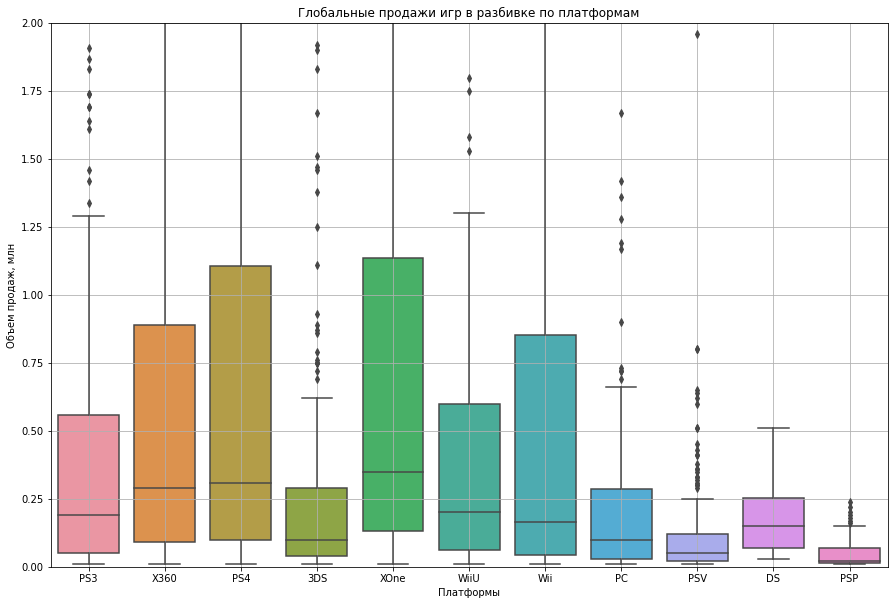

In [76]:
plt.figure(figsize = ([15,10]))
ax = sns.boxplot(data=work_df, x='platform', y='total_sales')
ax.set_ylim([0,2])
ax.set_ylabel('Объем продаж, млн')
ax.set_xlabel('Платформы')
ax.set_title('Глобальные продажи игр в разбивке по платформам')
ax.grid();

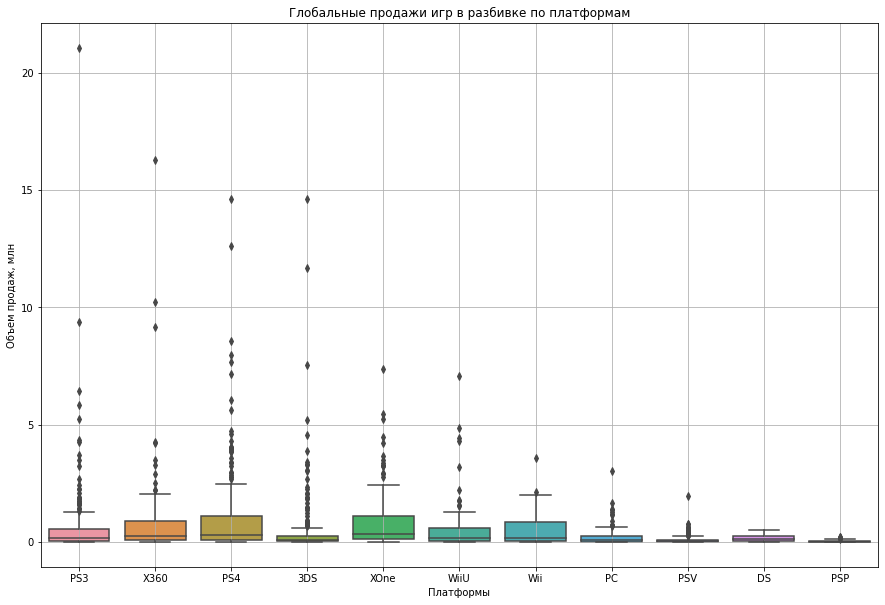

In [77]:
plt.figure(figsize = ([15,10]))
ax = sns.boxplot(data=work_df, x='platform', y='total_sales')
ax.set_ylabel('Объем продаж, млн')
ax.set_xlabel('Платформы')
ax.set_title('Глобальные продажи игр в разбивке по платформам')
ax.grid();

#### ВЫВОД

На основании представленных выше диаграмм, можем сделать вывод, что на платформе PS4 наибольшее количество выбросов и на данной платформе они сильнее отличаюстя. Это может говорить о том, что на данной платформе чаще появляются неординарные игры, которые лучше продаются, чем общая масса игр.

Так же на основании данного графика можно сказать, что на платформе XOne игры продаются лучше всего. Об этом можно судить, если смотреть при какой выручке находится 50% игр на каждой платформе.

### Влияние отзывов пользователей и критиков на продажи на самой популярной платформе

**Для исследования возьмем платформу PS4**

#### Оценка корреляции между объемом продаж и оценкой критиков на платформе PS4

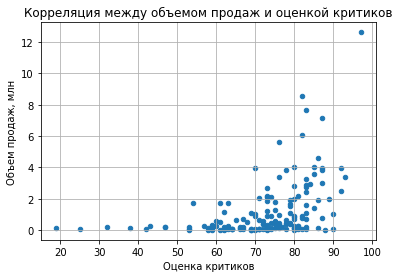

In [78]:
(
    work_df
    .query('platform == "PS4" and critic_score >= 0')
    .plot(
        x='critic_score',
        y='total_sales',
        xlabel='Оценка критиков',
        ylabel='Объем продаж, млн',
        kind='scatter',
        grid=True,
        title='Корреляция между объемом продаж и оценкой критиков')
);

In [79]:
work_df.query('platform == "PS4" and critic_score >= 0')['critic_score'].corr(
    work_df.query('platform == "PS4" and critic_score >= 0')['total_sales'])

0.4318482049982003

#### ВЫВОД

Корреляция между объемом продаж и оценкой критиков немного похожа на экспоненциальную, сила корелляции слабая в рамках платформы PS4

#### Оценка корреляции между объемом продаж и оценкой пользователей

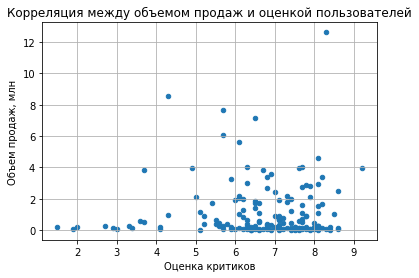

In [80]:
(
    work_df
    .query('platform == "PS4" and user_score >= 0')
    .plot(
        x='user_score',
        y='total_sales',
        xlabel='Оценка критиков',
        ylabel='Объем продаж, млн',
        kind='scatter',
        grid=True,
        title='Корреляция между объемом продаж и оценкой пользователей')
);

In [81]:
work_df.query('platform == "PS4" and user_score >= 0')['user_score'].corr(
    work_df.query('platform == "PS4" and user_score >= 0')['total_sales'])

0.024230832360622533

#### ВЫВОД

Корреляция между объемом продаж и оценкой пользователей очень слабая в рамках платформы PS4

### Влияние оценок пользователей и критиков на продажи на разных платформах

Для данного исследования возьмем топ 7 платформ по количеству продаж

#### Влияние оценки критиков на продажи на разных платформах

Коэффициент Пирсона для платформы PS4 составляет 0.4318482049982003, сила корреляции слабая
Коэффициент Пирсона для платформы PS3 составляет 0.33428533933719196, сила корреляции слабая
Коэффициент Пирсона для платформы X360 составляет 0.3503445460228666, сила корреляции слабая
Коэффициент Пирсона для платформы XOne составляет 0.4593845680707108, сила корреляции слабая
Коэффициент Пирсона для платформы 3DS составляет 0.38432600457452243, сила корреляции слабая
Коэффициент Пирсона для платформы WiiU составляет 0.3839512824903963, сила корреляции слабая
Коэффициент Пирсона для платформы PC составляет 0.2164032074613741, сила корреляции слабая


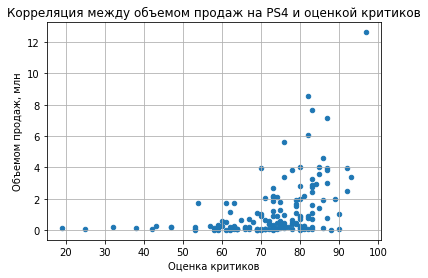

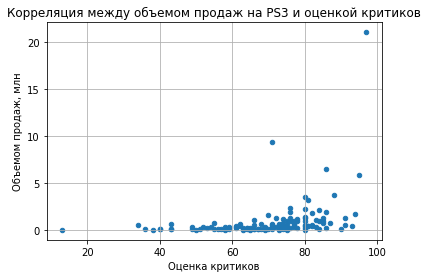

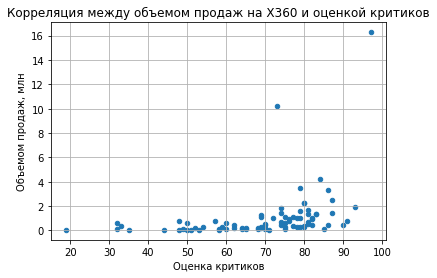

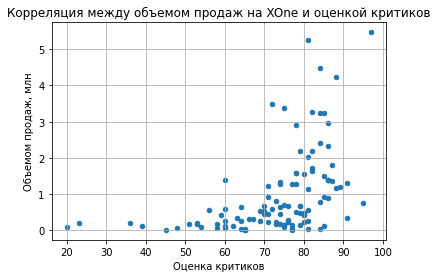

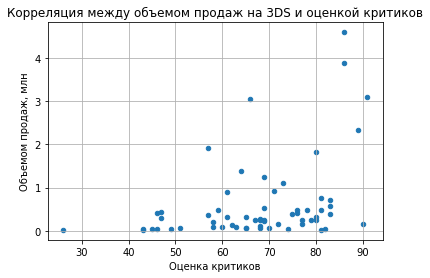

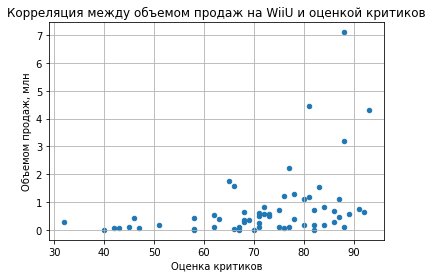

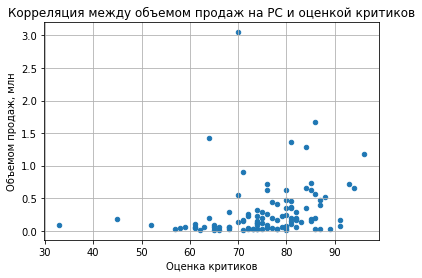

In [82]:
for platform in top_platforms:
    corr = (
        work_df
        .query('platform == @platform and critic_score >= 0')['critic_score']
        .corr(work_df
        .query('platform == @platform and critic_score >= 0')['total_sales'])
    )
    (
        work_df
        .query('platform == @platform and critic_score >= 0')
        .plot(
            x='critic_score',
            y='total_sales',
            xlabel='Оценка критиков',
            ylabel='Объемом продаж, млн',
            kind='scatter',
            grid=True,
            title=f'Корреляция между объемом продаж на {platform} и оценкой критиков'
        ) 
    )
    if corr <= 0.2:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции очень слабая')
    elif 0.5 >= corr > 0.2:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции слабая')
    elif 0.7 >= corr > 0.5:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции средняя')
    elif 0.9 >= corr > 0.7:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции высокая')
    elif corr > 0.9:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции очень высокая')

**ВЫВОД**

Корреляция между кол-вом продаж и оценкой критиков чаще бывает приближенной к  экспоненциальной. Самая сильная корреляция у платформы XOne, самая слабая у платформы PC

#### Влияние оценки пользователей на продажи на разных платформах

Коэффициент Пирсона для платформы PS4 составляет 0.024230832360622533, сила корреляции очень слабая
Коэффициент Пирсона для платформы PS3 составляет -0.016332728343513424, сила корреляции очень слабая
Коэффициент Пирсона для платформы X360 составляет -0.03456245410023829, сила корреляции очень слабая
Коэффициент Пирсона для платформы XOne составляет -0.039268285445522, сила корреляции очень слабая
Коэффициент Пирсона для платформы 3DS составляет 0.26471120670292764, сила корреляции слабая
Коэффициент Пирсона для платформы WiiU составляет 0.433476211473693, сила корреляции слабая
Коэффициент Пирсона для платформы PC составляет -0.12942822535329046, сила корреляции очень слабая


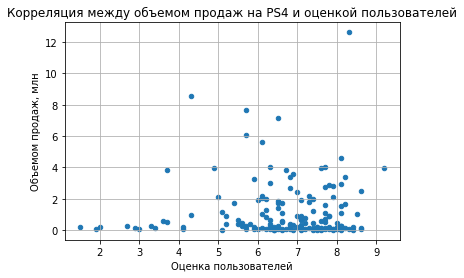

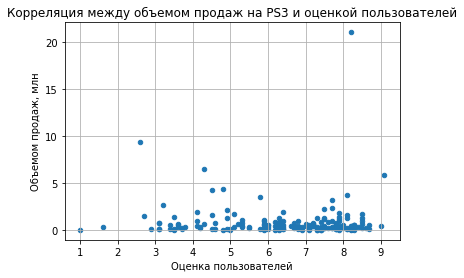

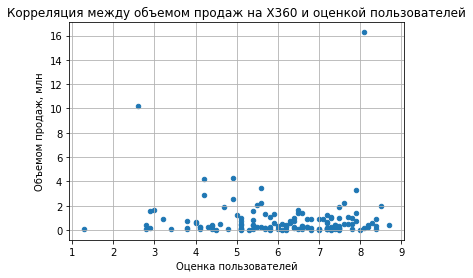

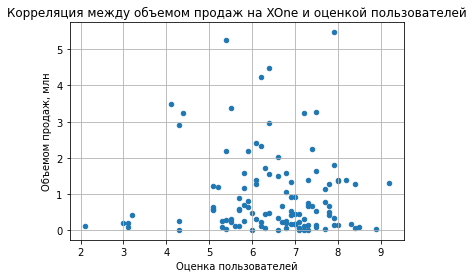

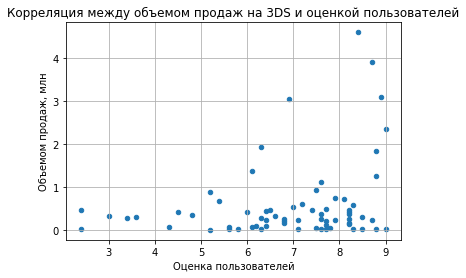

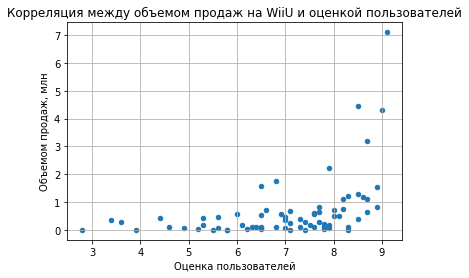

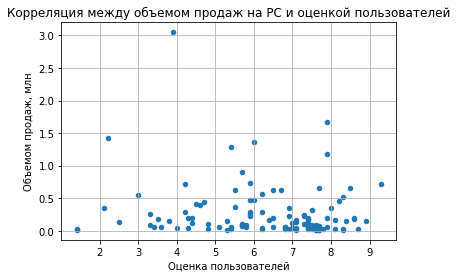

In [83]:
for platform in top_platforms:
    corr = (
        work_df
        .query('platform == @platform and user_score > 0')['user_score']
        .corr(work_df
        .query('platform == @platform and user_score > 0')['total_sales'])
    )
    (
        work_df
        .query('platform == @platform and user_score > 0')
        .plot(
            x='user_score',
            y='total_sales',
            xlabel='Оценка пользователей',
            ylabel='Объемом продаж, млн',
            kind='scatter',
            grid=True,
            title=f'Корреляция между объемом продаж на {platform} и оценкой пользователей'
        ) 
    )
    if corr <= 0.2:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции очень слабая')
    elif 0.5 >= corr > 0.2:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции слабая')
    elif 0.7 >= corr > 0.5:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции средняя')
    elif 0.9 >= corr > 0.7:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции высокая')
    elif corr > 0.9:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции очень высокая')


**ВЫВОД**

Корреляция между объемом продаж и оценкой пользователей колеблется от очень слабой до слабой. Самая сильная корреляция у платформы WiiU, самая слабая у платформы PS3

### Распределение игр по жанрам

In [84]:
genre_sales = work_df.groupby('genre')['total_sales'].agg(['sum', 'count']).sort_values(by='sum', ascending=False)

In [85]:
genre_sales['sales_per_game_mln'] = genre_sales['sum'] / genre_sales['count'] 

In [86]:
genre_sales.columns = ['total_sales_mln', 'games_count', 'sales_per_game_mln']

In [87]:
genre_sales

,total_sales_mln,games_count,sales_per_game_mln
genre,,,
Action,291.76,588,0.496190
Shooter,194.76,140,1.391143
Role-Playing,127.71,238,0.536597
Sports,127.16,166,0.766024
Misc,60.22,123,0.489593
Platform,39.40,59,0.667797
Racing,37.10,61,0.608197
Fighting,30.84,64,0.481875
Simulation,19.87,44,0.451591


**ВЫВОД**

- Больше всего игр выпускается в жанрах - Action, Role-Playing и Adventure
- Лучшие жанры по объему продаж:
    - Action - 291,76 миллионов продаж
    - Shooter - 194,76 миллионов продаж
- Лучшие жанры по объему продаж на одну игру:
    - Shooter - 1,39 миллиона продаж
    - Sports - 0,77 миллионов продаж
- Action (самые высокие объемы продаж) и Puzzle (самые низкие объемы продаж), они отличаются более чем в 90 раз

<div style="border:solid green 3px; padding: 30px">

### ВЫВОД

   Начиная с 2009 года начинается спад выпуска игр, который возможно начинает прерываться с 2015 года. Жизненный цикл платформы равен от 8 до 11 лет, период развития платформы занимает от 3 до 5 лет. XOne и PS4 являются растущими и потенциально прибыльными платформами для выпуска игр. Корреляция между объемом продаж и оценкой критиков чаще бывает приближенной к  экспоненциальной. Самая сильная корреляция у платформы X360, самая слабая у платформы PC. Сила корреляции между кол-вом продаж и оценкой пользователей либо слабая, либо очень слабая.
</div>

## Портрет пользователей каждого региона

### Портрет пользователя из региона NA

Посчитаем топ 5 результатов и засуммируем оставшиеся в отдельную группу

In [88]:
na_user_platform = work_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()

In [89]:
na_user_platform_f = na_user_platform[:5].copy()

others = pd.DataFrame(data = {
    'platform' : ['Other platform'],
    'na_sales' : [na_user_platform['na_sales'][5:].sum()]
})

na_user_platform_f = pd.concat([na_user_platform_f, others]).reset_index(drop=True)

In [90]:
na_user_platform_f

,platform,na_sales
0,PS4,87.25
1,X360,80.97
2,XOne,78.85
3,PS3,62.83
4,3DS,34.06
5,Other platform,48.82


In [91]:
na_user_genre = work_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()

In [92]:
na_user_genre_f = na_user_genre[:5].copy()

others = pd.DataFrame(data = {
    'genre' : ['Other genre'],
    'na_sales' : [na_user_genre['na_sales'][5:].sum()]
})

na_user_genre_f = pd.concat([na_user_genre_f, others]).reset_index(drop=True)

In [93]:
na_user_genre_f

,genre,na_sales
0,Action,116.76
1,Shooter,93.50
2,Sports,57.73
3,Role-Playing,40.51
4,Misc,26.73
5,Other genre,57.55


In [94]:
na_user_rating = work_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index(name='na_sales')

In [95]:
na_user_rating

,rating,na_sales
0,M,149.54
1,No rating,80.89
2,E,71.08
3,E10+,50.43
4,T,40.84


**ВЫВОД**

По пользователям из региона NA можно сделать следующие выводы:
- Самые популярные платформы: PS4, X360, XOne
- Самые популярные жанры Action и Shooter
- Чаще всего продаются игры с рейтингом M (Материалы игры не подходят для подростков младше 17 лет)

### Портрет пользователя из региона EU

In [96]:
eu_user_platform = work_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()

In [97]:
eu_user_platform_f = eu_user_platform[:5].copy()

others = pd.DataFrame(data = {
    'platform' : ['Other platform'],
    'eu_sales' : [eu_user_platform['eu_sales'][5:].sum()]
})

eu_user_platform_f = pd.concat([eu_user_platform_f, others]).reset_index(drop=True)

In [98]:
eu_user_platform_f

,platform,eu_sales
0,PS4,109.31
1,PS3,66.55
2,XOne,41.96
3,X360,41.81
4,3DS,28.63
5,Other platform,52.75


In [99]:
eu_user_genre = work_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()

In [100]:
eu_user_genre_f = eu_user_genre[:5].copy()

others = pd.DataFrame(data = {
    'genre' : ['Other genre'],
    'eu_sales' : [eu_user_genre['eu_sales'][5:].sum()]
})

eu_user_genre_f = pd.concat([eu_user_genre_f, others]).reset_index(drop=True)

In [101]:
eu_user_genre_f

,genre,eu_sales
0,Action,107.45
1,Shooter,71.96
2,Sports,48.51
3,Role-Playing,32.69
4,Misc,19.38
5,Other genre,61.02


In [102]:
eu_user_rating = (
    work_df
    .groupby('rating')['eu_sales'].sum()
    .sort_values(ascending=False)
    .reset_index(name='eu_sales')
)

In [103]:
eu_user_rating

,rating,eu_sales
0,M,128.78
1,No rating,71.44
2,E,69.75
3,E10+,38.88
4,T,32.16


**ВЫВОД**

По пользователям из региона EU можно сделать следующие выводы:
- Самая популярная платформа PS4
- Самый популярный жанр Action и Shooter
- Чаще всего продаются игры с рейтингом M (Материалы игры не подходят для подростков младше 17 лет)

### Портрет пользователя из региона JP

In [104]:
jp_user_platform = work_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()

In [105]:
jp_user_platform_f = jp_user_platform[:5].copy()

others = pd.DataFrame(data = {
    'platform' : ['Other platform'],
    'jp_sales' : [jp_user_platform['jp_sales'][5:].sum()]
})

jp_user_platform_f = pd.concat([jp_user_platform_f, others]).reset_index(drop=True)

In [106]:
jp_user_platform_f

,platform,jp_sales
0,3DS,59.78
1,PS3,22.05
2,PSV,15.03
3,PS4,10.22
4,WiiU,10.21
5,Other platform,4.18


In [107]:
jp_user_genre = work_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()

In [108]:
jp_user_genre_f = jp_user_genre[:5].copy()

others = pd.DataFrame(data = {
    'genre' : ['Other genre'],
    'jp_sales' : [jp_user_genre['jp_sales'][5:].sum()]
})

jp_user_genre_f = pd.concat([jp_user_genre_f, others]).reset_index(drop=True)

In [109]:
jp_user_genre_f

,genre,jp_sales
0,Role-Playing,44.43
1,Action,33.42
2,Misc,8.16
3,Fighting,6.90
4,Shooter,5.55
5,Other genre,23.01


In [110]:
jp_user_rating = work_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index(name='jp_sales')

In [111]:
jp_user_rating

,rating,jp_sales
0,No rating,70.73
1,T,18.32
2,E,14.07
3,M,12.91
4,E10+,5.44


**ВЫВОД**


По пользователям из региона JP можно сделать следующие выводы:
- Самая популярная платформа 3DS
- Самые популярные жанры Role-Playing и Action
- Чаще всего продаются игры без проставленного рейтинга ESRB

### ВЫВОД



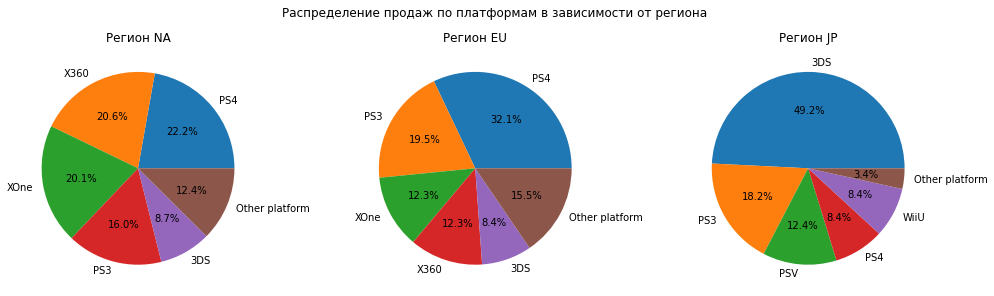

In [112]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14, 4), constrained_layout=True)
axs[0].pie(na_user_platform_f['na_sales'], labels=na_user_platform_f['platform'],  autopct='%1.1f%%')
axs[0].set_title('Регион NA')
axs[1].pie(eu_user_platform_f['eu_sales'], labels=eu_user_platform_f['platform'],  autopct='%1.1f%%')
axs[1].set_title('Регион EU')
axs[2].pie(jp_user_platform_f['jp_sales'], labels=jp_user_platform_f['platform'],  autopct='%1.1f%%')
axs[2].set_title('Регион JP')
fig.suptitle('Распределение продаж по платформам в зависимости от региона');

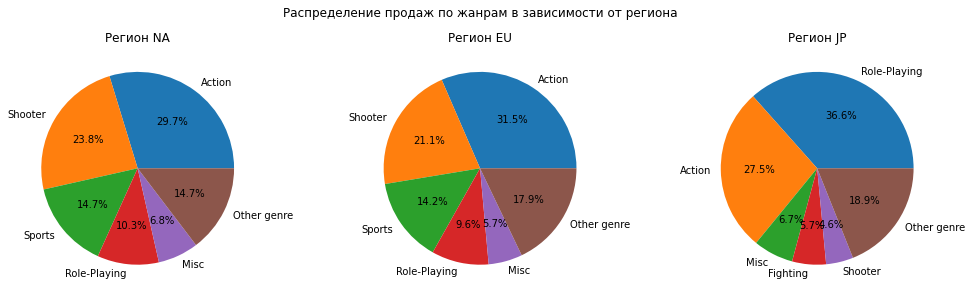

In [113]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14, 4), constrained_layout=True)
axs[0].pie(na_user_genre_f['na_sales'], labels=na_user_genre_f['genre'],  autopct='%1.1f%%')
axs[0].set_title('Регион NA')
axs[1].pie(eu_user_genre_f['eu_sales'], labels=eu_user_genre_f['genre'],  autopct='%1.1f%%')
axs[1].set_title('Регион EU')
axs[2].pie(jp_user_genre_f['jp_sales'], labels=jp_user_genre_f['genre'],  autopct='%1.1f%%')
axs[2].set_title('Регион JP')
fig.suptitle('Распределение продаж по жанрам в зависимости от региона');

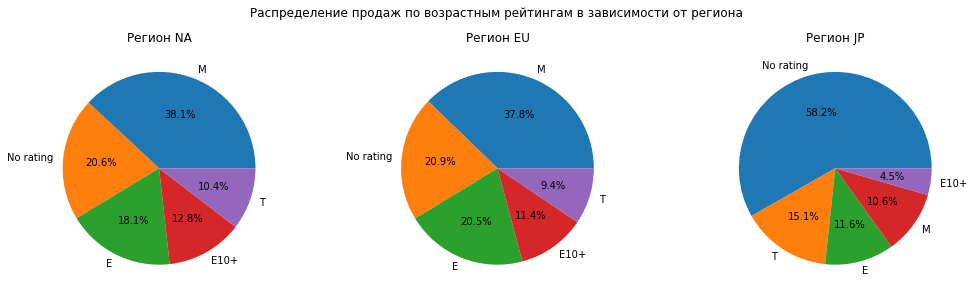

In [114]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14, 4), constrained_layout=True)
axs[0].pie(na_user_rating['na_sales'], labels=na_user_rating['rating'],  autopct='%1.1f%%')
axs[0].set_title('Регион NA')
axs[1].pie(eu_user_rating['eu_sales'], labels=eu_user_rating['rating'],  autopct='%1.1f%%')
axs[1].set_title('Регион EU')
axs[2].pie(jp_user_rating['jp_sales'], labels=jp_user_rating['rating'],  autopct='%1.1f%%')
axs[2].set_title('Регион JP')
fig.suptitle('Распределение продаж по возрастным рейтингам в зависимости от региона');

<div style="border:solid green 3px; padding: 30px">
    
- Пользователи с региона EU и NA сильно похожи, имеют небольшие отличия.
- Пользователи из региона JP сильно отличаются по своим предпочтениям, как по платформам, так и по возрастному рейтингу ESRB.
- Жанр Action оказался очень популярным во всех регионах
    
</div>

## Проверка гипотез

### Гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

(При формирование альтернативной гипотезы и исходили из того, что каких-либо данных о разлчие рейтингов на разных плотформах нет)

In [115]:
user_score_xbox = work_df.query('platform == "XOne" and user_score >= 0')['user_score']

In [116]:
user_score_xbox.describe()

count    116.000000
mean       6.477586
std        1.288213
min        2.100000
25%        5.775000
50%        6.700000
75%        7.300000
max        9.200000
Name: user_score, dtype: float64

In [117]:
user_score_pc = work_df.query('platform == "PC" and user_score >= 0')['user_score']

In [118]:
user_score_pc.describe()

count    110.000000
mean       6.258182
std        1.751193
min        1.400000
25%        5.325000
50%        6.750000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

**Выборка по размеру средняя, установим критический уровень статистической значимости равный 0.01**

In [119]:
alpha = .01

results = st.ttest_ind(user_score_xbox, user_score_pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2867036680187632
Не получилось отвергнуть нулевую гипотезу


**ВЫВОД**

Представленные данные не противоречат выдвинутой гипотезе. Вероятность, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые состовляет приблизительно 71,4%

### Средние пользовательские рейтинги жанров Action и Sports разные
H0 - Средние пользовательские рейтинги жанров Action и Sports не равны

H1 - Средние пользовательские рейтинги жанра Sports и Action равны

In [120]:
user_score_action = work_df.query('genre == "Action" and user_score >= 0')['user_score']

In [121]:
user_score_action.count()

304

In [122]:
user_score_sports = work_df.query('genre == "Sports" and user_score >= 0')['user_score']

In [123]:
user_score_sports.count()

123

**Выборка по размеру средняя, установим критический уровень статистической значимости равный 0.01**

In [124]:
alpha = .01

results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)

print('p-значение:', 1 - results.pvalue)

if 1 - results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0
Не получилось отвергнуть нулевую гипотезу


In [125]:
print(f'Средний пользовательский рейтинг в жанре Sport, составляет: {round(user_score_sports.mean(), 2)}')

Средний пользовательский рейтинг в жанре Sport, составляет: 5.18


In [126]:
print(f'Средний пользовательский рейтинг в жанре Action, составляет: {round(user_score_action.mean(), 2)}')

Средний пользовательский рейтинг в жанре Action, составляет: 6.89


**ВЫВОД**

Представленные данные не противоречат выдвинутой гипотезе. Вероятность, что средние пользовательские рейтинги жанра Action и Sports разные состовляет приблизительно 100%

<div style="border:solid green 3px; padding: 30px">

### ВЫВОД    

    Данные не противоречат обеим выдвинутым гипотезам.
    
</div>

<div style="border:solid green 3px; padding: 30px">

## ОБЩИЙ ВЫВОД
    
    При предобработке данных была выявлена проблема большого количества пропусков в столбцах `critic_score`, `user_score` и `rating`. В них не хватает от 40 до 51% процента. Проблема большого количества пропусков, скорее всего, связана с техническими проблемами, при получении данных из открытых источников.
    
    Начиная с 2009 года начинается спад выпуска игр, который возможно начинает прерываться с 2015 года. Жизненный цикл платформы равен от 8 до 11 лет, период развития платформы занимает от 3 до 5 лет. Большинство платформ с большим количеством продаж появилось с 2005 и к 2016 году они приблизились к своему закату. XOne и PS4 являются растущими и потенциально прибыльными платформами для выпуска игр. Корреляция между объемом продаж и оценкой критиков чаще бывает приближенной к  экспоненциальной. Самая сильная корреляция у платформы X360, самая слабая у платформы PC. Сила корреляции между объемами продаж и оценкой пользователей либо слабая, либо очень слабая.
    
    Пользователи с региона EU и NA сильно похожи, имеют небольшие отличия. Пользователи из региона JP сильно отличаются по своим предпочтениям, как по платформам, так и по возрастному рейтингу.
    
    Обе гипотезы данного ислледования небыли опровергнуты.
</div>

<div style="border:solid green 3px; padding: 30px">

## РЕКОМЕНДАЦИИ
    
    На основании данного исследования рекомендую:
    - Платформы XOne и PS4
    - Жанр Action наиболее объемный по продажам и входит в топ 2 жанров всех регионов
    - Жанр Shooter входит в топ 2 жанров в регионах EU и NA
    - Самый популярный возрастной рейтинг M  
    - Регионы EU и NA сильно похожи, имеют одинаковые предпочтения в платформах, жанрах и возрастных рейтингах
    - На оценку критиков стоит обращать внимание, в большую степень нежели обращать внимание на оценку пользователей
    
</div>